In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression

import numpy as np
import mglearn
import mglearn.datasets

In [2]:
from sklearn.datasets import load_linnerud
linnerud = load_linnerud()
X_train, X_test, y_train, y_test = train_test_split(linnerud["data"], linnerud["target"], random_state=42)

In [3]:
print(f"Ключи linnerud: \n{linnerud.keys()}")

Ключи linnerud: 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [4]:
print(f"Форма массива data: \n {linnerud['data'].shape}")

Форма массива data: 
 (20, 3)


In [5]:
print(f"Имена признаков: \n {linnerud.feature_names}")

Имена признаков: 
 ['Chins', 'Situps', 'Jumps']


In [6]:
print(f"Все классы: \n {linnerud['target_names']}")

Все классы: 
 ['Weight', 'Waist', 'Pulse']


In [7]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [8]:
print("Прогнозы для тестового набора: \n {}".format(reg.predict(X_test)))

Прогнозы для тестового набора: 
 [[175.          34.33333333  52.        ]
 [158.66666667  33.33333333  56.66666667]
 [158.66666667  33.33333333  56.66666667]
 [177.          35.66666667  60.        ]
 [166.33333333  34.          54.66666667]]


In [9]:
print("R^2 на тестовом наборе: {:.2f}".format(reg.score(X_test, y_test)))

R^2 на тестовом наборе: -0.36


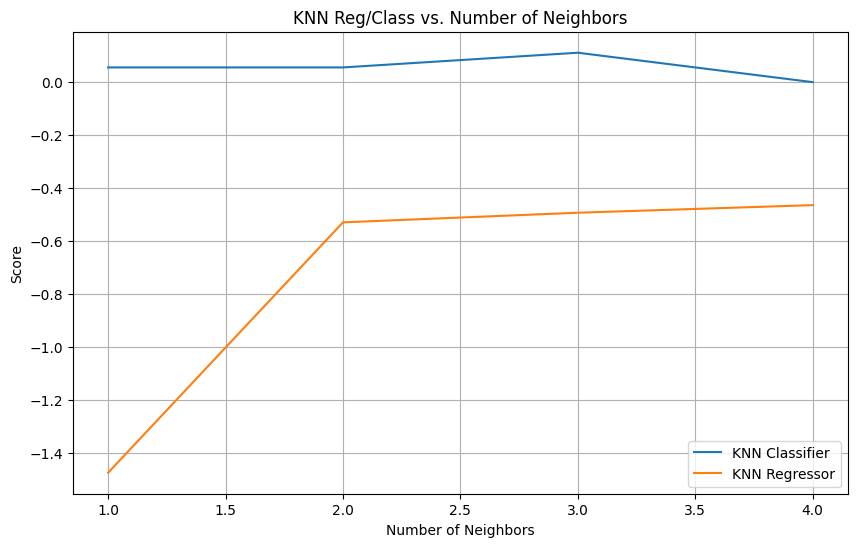

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import load_linnerud


diabetes = load_linnerud()
X = diabetes.data
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_neighbors_values = range(1, 5)

knn_classifier = []
knn_regressor = []
for n_neighbors in n_neighbors_values:
    
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    knn_regressor.append(reg.score(X_test, y_test))
    

    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
        
    knn_classifier.append(np.mean(y_pred == y_test))

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, knn_classifier, label="KNN Classifier")
plt.plot(n_neighbors_values, knn_regressor, label="KNN Regressor")
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.legend()
plt.title("KNN Reg/Class vs. Number of Neighbors")
plt.grid(True)
plt.show()

У меня не получилось добиться позитивного числа при прогнозе тестовых данных, используя регрессию, 
но метод к-ближайших соседей дает хоть такой результат.

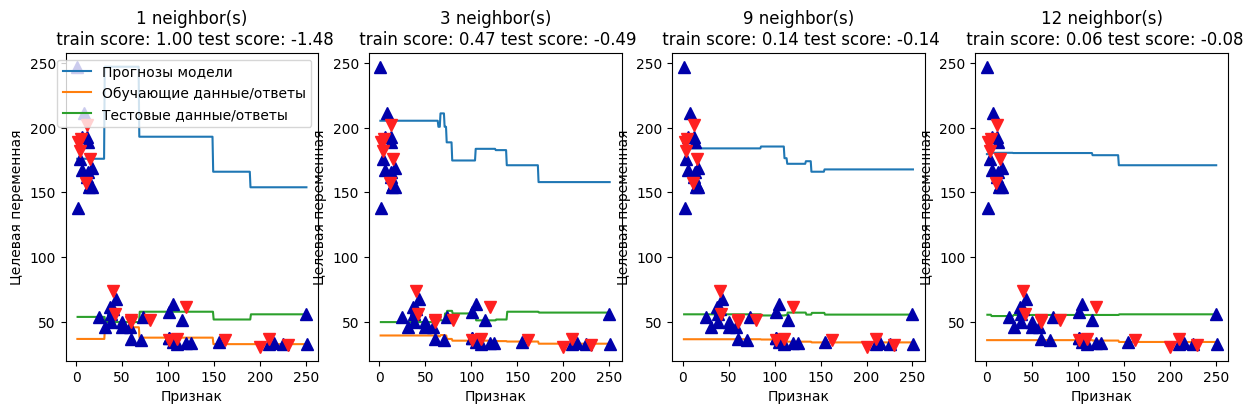

In [11]:
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(1, 251, 999).reshape(-1, 3)
for n_neighbors, ax in zip([1, 3, 9, 12], axes):
 # получаем прогнозы, используя 1, 3, и 9 соседей
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Признак")
 ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
 "Тестовые данные/ответы"], loc="best")

LinearRegression

In [12]:
lr = LinearRegression().fit(X_train, y_train)

In [13]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [[ 0.30287324 -0.37960682  0.16074124]
 [-0.09726556 -0.04709369  0.02708315]
 [-0.58694615  0.05327211 -0.00428332]]
lr.intercept_: [213.69337737  41.05782266  54.38303224]


In [14]:
print("Правильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.68


Ridge

In [15]:
ridge = Ridge().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.68


In [16]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.67


In [17]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))

Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.68


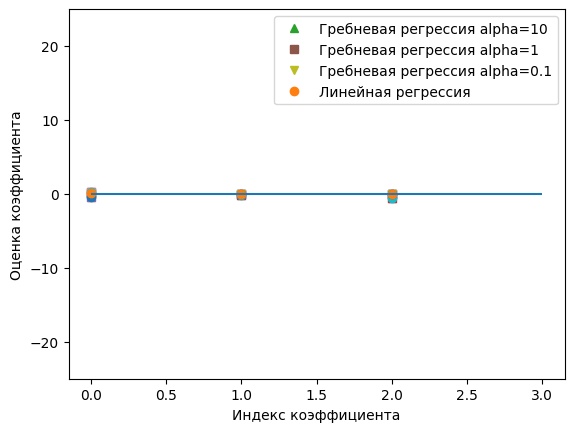

In [18]:
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

Lasso

In [19]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество используемых признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.66
Количество используемых признаков: 9.00


In [20]:
lasso001 = Lasso(alpha = 0.01, max_iter = 100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество используемых признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.68
Количество используемых признаков: 9.00


In [21]:
lasso00001 = Lasso(alpha = 0.0001, max_iter = 100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество используемых признаков: {:.2f}".format(np.sum(lasso.coef_ != 0)))

Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.68
Количество используемых признаков: 9.00


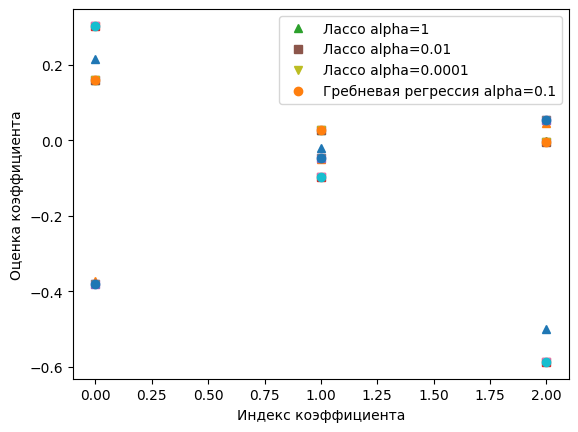

In [22]:
plt.plot(lasso.coef_, '^', label="Лассо alpha=1")
plt.plot(lasso001.coef_, 's', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()
# Для того что бы убрать дубликаты
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())